# Support Vector Machines-2

**Q1. What is the relationship between polynomial functions and kernel functions in machine learning algorithms?**

Polynomial kernel functions in machine learning are essentially a way to implicitly map the input data into a higher-dimensional space where the data becomes linearly separable. This allows us to apply linear algorithms like SVMs to non-linearly separable data.

The kernel function calculates the dot product of the transformed data points in the higher-dimensional space without explicitly computing the transformations. This is computationally efficient and avoids the "curse of dimensionality."

**Q2. How can we implement an SVM with a polynomial kernel in Python using Scikit-learn?**

In [1]:
from sklearn.svm import SVC
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Load the iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create an SVM classifier with a polynomial kernel
svm = SVC(kernel='poly', degree=3)  # Adjust the degree parameter as needed

# Train the model
svm.fit(X_train, y_train)

# Make predictions
y_pred = svm.predict(X_test)

# Evaluate performance
# ...


Accuracy: 0.73


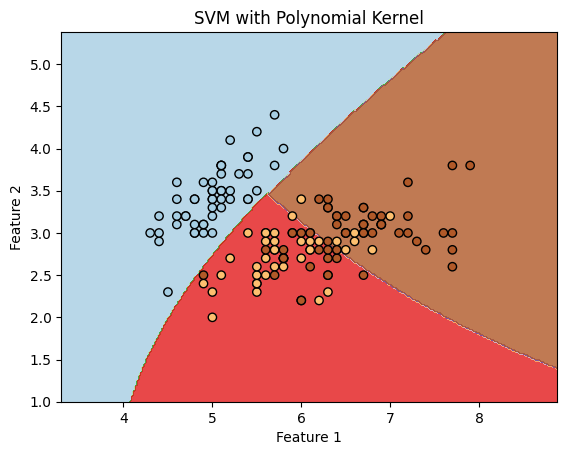

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

iris = datasets.load_iris()
X = iris.data[:, :2]  # Use only the first two features for visualization
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

clf = svm.SVC(kernel='poly', degree=3, C=1)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

def plot_decision_boundaries(clf, X, y):
    h = .02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Paired)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', cmap=plt.cm.Paired)
    plt.title('SVM with Polynomial Kernel')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

plot_decision_boundaries(clf, X, y)

**Q3. How does increasing the value of epsilon affect the number of support vectors in SVR?**

Epsilon in Support Vector Regression (SVR) defines the width of the epsilon-insensitive tube. Increasing the epsilon value will increase the number of support vectors. This is because a wider tube allows for more data points to be considered as support vectors, as they are within the epsilon distance from the regression line.

**Q4. How does the choice of kernel function, C parameter, epsilon parameter, and gamma parameter affect the performance of Support Vector Regression (SVR)? Can you explain how each parameter works and provide examples of when you might want to increase or decrease its value?**

Kernel function: Determines the type of mapping into the higher-dimensional space.

Linear: Suitable for linearly separable data.
Polynomial: Captures polynomial relationships between features.
RBF: Commonly used for non-linear relationships.
Sigmoid: Less common, similar to logistic regression.
C parameter: Controls the trade-off between maximizing the margin and minimizing training errors. A higher C leads to a smaller margin but less misclassification, while a lower C allows for more misclassifications but a larger margin.

Epsilon parameter: In SVR, it defines the width of the epsilon-insensitive tube. A larger epsilon allows for more data points to be considered correct without penalty, potentially leading to underfitting. A smaller epsilon results in a stricter model, which might overfit.

Gamma parameter: Used in RBF kernel, it controls the influence of a data point. A higher gamma means a narrower Gaussian function, leading to a more complex model (potential overfitting), while a lower gamma results in a simpler model (potential underfitting).

Q5. Assignment:
- Import the necessary libraries and load the dataset
- Split the dataset into training and testing sets
- Preprocess the data using any technique of your choice (e.g. scaling, normalisation)
- Create an instance of the SVC classifier and train it on the training data
- Use the trained classifier to predict the labels of the testing data
- Evaluate the performance of the classifier using any metric of your choice (e.g. accuracy, precision, recall, F1-score)
- Tune the hyperparameters of the SVC classifier using GridSearchCV or RandomizedSearchCV to improve its performance
- Train the tuned classifier on the entire dataset
- Save the trained classifier to a file for future use.


In [3]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import joblib

# Load dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Preprocess the data (scaling)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create an instance of the SVC classifier
clf = SVC()

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Predict the labels of the testing data
y_pred = clf.predict(X_test)

# Evaluate the performance of the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Tune hyperparameters using GridSearchCV
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'kernel': ['linear', 'poly', 'rbf'],
    'gamma': ['scale', 'auto']
}
grid_search = GridSearchCV(SVC(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best model from the grid search
best_clf = grid_search.best_estimator_

# Train the tuned classifier on the entire dataset
X_full = scaler.fit_transform(X)
best_clf.fit(X_full, y)

# Save the trained classifier to a file
joblib.dump(best_clf, 'svc_model.pkl')

print("Model training complete and saved to 'svc_model.pkl'.")

Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

Model training complete and saved to 'svc_model.pkl'.
